## `Deep Learning`

In [85]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.metrics import Recall

In [2]:
data = pd.read_csv("features.csv", index_col=0)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,blood_pressure,age_blood_press,age_chol,age_smoking,bmi_glu
id,,,,,,,,,,,,,,,,,,
0,50,0,168,62.0,110,80,1,1,0,0,1,0,22.0,8800,440000,50,0,22.0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.9,12600,693000,165,0,34.9
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.5,9100,464100,153,0,23.5
3,48,0,169,82.0,150,100,1,1,0,0,1,1,28.7,15000,720000,48,0,28.7
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.0,6000,282000,47,0,23.0


In [3]:
# Data split
X = data.drop(columns=['cardio'])
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.20,
                                                    random_state=123)

In [4]:
# Standard scaler
with open("std_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_train.shape

((54804, 17), (54804,), (13702, 17), (54804,))

In [6]:
# Scale X_train and X_test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### `Base Sequential Model`

In [14]:
scaled_X_train.shape[0]

54804

In [ ]:
# Base model with a single hidden layer
base_net = Sequential()

base_net.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[-1],))) # Input layer
base_net.add(layers.Dense(32, activation='relu')) # Hidden layer
base_net.add(layers.Dense(1, activation='sigmoid')) # Output layer

# Model compile
base_net.compile(
    optimizer='adam',
    metrics=[Recall()],
    loss='binary_crossentropy'
)

# Model fit
results = base_net.fit(
    scaled_X_train,
    y_train,
    epochs=10,
    batch_size=20,
    validation_data=(scaled_X_test, y_test)
)

Epoch 1/10


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2741/2741 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.5533 - recall: 0.6966 - val_loss: 0.5466 - val_recall: 0.6945
Epoch 2/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5461 - recall: 0.6968 - val_loss: 0.5439 - val_recall: 0.6955
Epoch 3/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5448 - recall: 0.6968 - val_loss: 0.5452 - val_recall: 0.6742
Epoch 4/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5431 - recall: 0.6951 - val_loss: 0.5434 - val_recall: 0.6725
Epoch 5/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5423 - recall: 0.6945 - val_loss: 0.5484 - val_recall: 0.7100
Epoch 6/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5419 - recall: 0.6954 - val_loss: 0.5429 - val_recall: 0.6967
Epoch 7/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5413 - recall: 0.6945 - val_loss: 0.5456 - val_recall: 0.6813
Epoch 8/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5408 - recall: 0.6938 - val_loss: 0.5439 - val_recall: 0.7000
Epo

In [81]:
def net_results_viz(net_model_results):
    recall = net_model_results.history['recall']
    val_recall = net_model_results.history['val_recall']
    loss = net_model_results.history['loss']
    val_loss = net_model_results.history['val_loss']

    fig, axes = plt.subplots(figsize=(10,4), ncols=2, nrows=1)
    x_range = net_model_results.epoch # Number of model epochs
    sns.lineplot(x=x_range, y=recall, ax=axes[0])
    sns.lineplot(x=x_range, y=val_recall, ax=axes[0], color='green')
    sns.lineplot(x=x_range, y=loss, ax=axes[1])
    sns.lineplot(x=x_range, y=val_loss, ax=axes[1], color='green')

    axes[0].set_xlabel("Epochs")
    axes[0].legend(['Recall', 'Validation Recall'])
    axes[1].set_xlabel("Epochs")
    axes[0].set_ylabel("Recall")
    axes[1].set_ylabel("Loss")
    axes[1].legend(['Loss', 'Validation Loss'])

    plt.show()

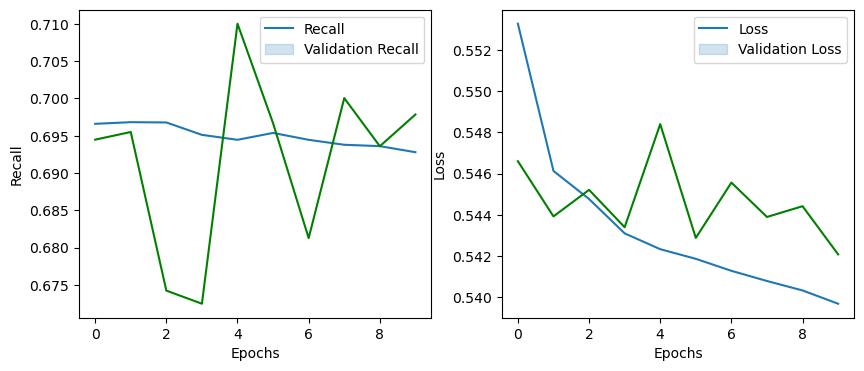

In [83]:
net_results_viz(results)

#### `NN with 3 hidden layers`

In [87]:
X_train.shape[-1]

17

In [88]:
sec_net = Sequential([
    layers.Dense(64, input_shape=(X_train.shape[-1],),kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4) , activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

sec_net.compile(
    optimizer='adam',
    metrics=[Recall()],
    loss='binary_crossentropy'
)

sec_net_results = sec_net.fit(
    scaled_X_train,
    y_train,
    epochs=10,
    batch_size=20,
    validation_data=(scaled_X_test, y_test)
)

Epoch 1/10


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2741/2741 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.5593 - recall_4: 0.6976 - val_loss: 0.5568 - val_recall_4: 0.6479
Epoch 2/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5504 - recall_4: 0.6901 - val_loss: 0.5488 - val_recall_4: 0.6844
Epoch 3/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5476 - recall_4: 0.6844 - val_loss: 0.5519 - val_recall_4: 0.6613
Epoch 4/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5468 - recall_4: 0.6840 - val_loss: 0.5462 - val_recall_4: 0.6893
Epoch 5/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5458 - recall_4: 0.6843 - val_loss: 0.5470 - val_recall_4: 0.6657
Epoch 6/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5447 - recall_4: 0.6851 - val_loss: 0.5458 - val_recall_4: 0.6920
Epoch 7/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5444 - recall_4: 0.6871 - val_loss: 0.5447 - val_recall_4: 0.6992
Epoch 8/10
2741/2741 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5438 - recall_4: 0.6852 - val_loss: 0